In [1]:
!pip install kaggle

In [8]:
from google.colab import files

files.upload()

Saving training-c.csv to training-c.csv


{'training-c.csv': b'filename,original filename,scanid,digit,database name original,contributing team,database name\r\nc00000.png,Scan_280_digit_6_num_7.png,280,6,OngkoDB,Buet_Backpropers,training-c\r\nc00001.png,Scan_29_digit_1_num_1.png,29,1,OngkoDB,Buet_Backpropers,training-c\r\nc00002.png,Scan_131_digit_3_num_1.png,131,3,OngkoDB,Buet_Backpropers,training-c\r\nc00003.png,Scan_160_digit_2_num_2.png,160,2,OngkoDB,Buet_Backpropers,training-c\r\nc00004.png,Scan_202_digit_7_num_0.png,202,7,OngkoDB,Buet_Backpropers,training-c\r\nc00005.png,Scan_93_digit_3_num_1.png,93,3,OngkoDB,Buet_Backpropers,training-c\r\nc00006.png,Scan_4_digit_4_num_1.png,4,4,OngkoDB,Buet_Backpropers,training-c\r\nc00007.png,Scan_60_digit_7_num_2.png,60,7,OngkoDB,Buet_Backpropers,training-c\r\nc00008.png,Scan_141_digit_5_num_9.png,141,5,OngkoDB,Buet_Backpropers,training-c\r\nc00009.png,Scan_141_digit_3_num_7.png,141,3,OngkoDB,Buet_Backpropers,training-c\r\nc00010.png,Scan_0_digit_0_num_3.png,0,0,OngkoDB,Buet_Backprop

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [10]:
!kaggle datasets download -d BengaliAI/numta

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [3]:
import torch
import os
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import pandas as pd
import numpy as np
import shutil
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
PATH = "/content/"

In [6]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(PATH + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [11]:
c_csv = showRawTrainingSamples('training-c.csv')


training-c.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')


In [12]:
c_csv = c_csv[['filename', 'digit']]


In [30]:
print(c_csv.iloc[:6, :])


     filename  digit
0  c00000.png      6
1  c00001.png      1
2  c00002.png      3
3  c00003.png      2
4  c00004.png      7
5  c00005.png      3


In [23]:
merged_csv = pd.concat([ c_csv,])
print(len(merged_csv))

24298


In [32]:
from torch.utils.data import Dataset
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [90]:
TRAIN_PATH = 'train'


In [40]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])
test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)

In [176]:
batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
output_dim = 10

X_train = [0][0]
train_loader = [0][0]
learning_rate = 0.01
test_loader = [0][0]
X_test = [0][0]

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [133]:
from sklearn.model_selection import train_test_split

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)


train_loader = torch.utils.data.DataLoader(dataset=X_train, 
                                        batch_size=batch_size)
                                       # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=X_test, 
                                        batch_size=batch_size) 


In [140]:
# One Image Size
print (X_train)
print (X_train)
# First Image Label
print (X_train)

0
0
0


In [156]:
show_img = X_train


In [159]:
print("Label:")
print(X_train)

show_img = X_train


Label:
0


In [95]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [96]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [97]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [180]:
'''
TRAIN THE MODEL
'''
num_epochs = num_iters / (X_train) / batch_size)
num_epochs = int(num_epochs)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

SyntaxError: ignored

[]


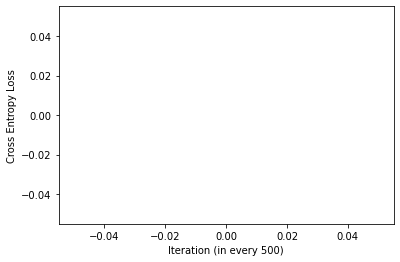

In [171]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [103]:
from google.colab import drive

drive.mount('/content/gdrive')

root_path ='/content/gdrive/My Drive/SoftCom'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [172]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'NumtaDB_logistic.pkl') 

In [105]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'NumtaDB_logistic.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


In [177]:
for images, labels in (test_loader):
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

TypeError: ignored

In [178]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

NameError: ignored